# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2023-12-15 17:52:40.142760: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 17:52:40.142801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 17:52:40.144183: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 17:52:40.151058: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-15 17:52:40.925735: W tensorflow/compiler/tf2

2.15.0


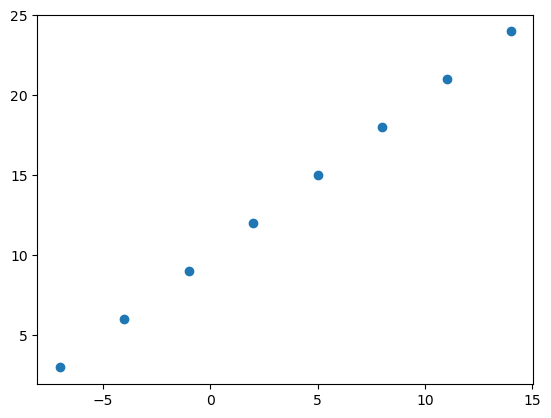

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shape

In [4]:
# Create a demo tensor for our housing price prediciton problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2023-12-15 17:52:42.445333: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-15 17:52:42.480474: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X[0].ndim

0

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

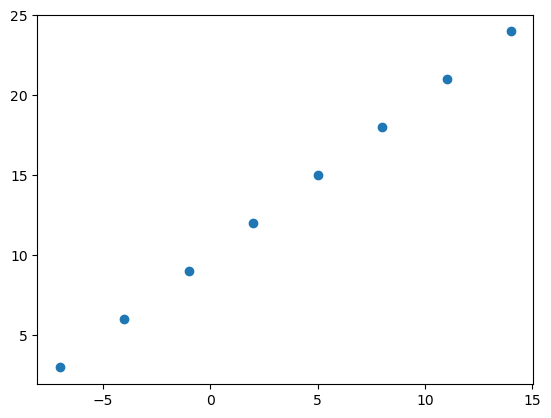

In [10]:
plt.scatter(X, y)

# Modelling with TensorFlow

**1. Creating a model**

**2. Compiling a model**

**3. Fitting a model**

In [11]:
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))  # Specify input_shape for the first layer
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 201ms/step - loss: 12.8839 - mae: 12.8839
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 12.7514 - mae: 12.7514
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 12.6189 - mae: 12.6189
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 12.4864 - mae: 12.4864
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 12.3539 - mae: 12.3539


In [12]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 53ms/step


array([[6.0174885]], dtype=float32)

In [13]:
y_pred + 11

array([[17.017488]], dtype=float32)

# Improving our model
We can improve our model. by altering the steps we took to create a model.

**1. Creating a model**

**2. Compiling a model**

**3. Fitting a model**

In [14]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 251ms/step - loss: 16.7652 - mae: 16.7652
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 16.7592 - mae: 16.7592
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 16.7532 - mae: 16.7532
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 16.7472 - mae: 16.7472
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 16.7412 - mae: 16.7412
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 16.7352 - mae: 16.7352
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 16.7292 - mae: 16.7292
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 16.7232 - mae: 16.7232
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 16.7172 - mae: 16.7172
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 16.7112 - mae: 16.7112
Epoch 11/100
1/1 [==============================] - 0s 4m

1/1 [==============================] - 0s 4ms/step - loss: 16.2492 - mae: 16.2492
Epoch 88/100
1/1 [==============================] - 0s 4ms/step - loss: 16.2432 - mae: 16.2432
Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 16.2372 - mae: 16.2372
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 16.2312 - mae: 16.2312
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 16.2252 - mae: 16.2252
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 16.2192 - mae: 16.2192
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 16.2132 - mae: 16.2132
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 16.2072 - mae: 16.2072
Epoch 95/100
1/1 [==============================] - 0s 3ms/step - loss: 16.2012 - mae: 16.2012
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 16.1952 - mae: 16.1952
Epoch 97/100
1/1 [==============================] - 0s 3ms/step

In [15]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 42ms/step


array([[-11.201494]], dtype=float32)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

# 3. 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=50) 

Epoch 1/50
1/1 [==============================] - 0s 345ms/step - loss: 13.6064 - mae: 13.6064
Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 12.6146 - mae: 12.6146
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 11.6234 - mae: 11.6234
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 10.6265 - mae: 10.6265
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 9.6168 - mae: 9.6168
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 8.5863 - mae: 8.5863
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 7.5274 - mae: 7.5274
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 6.7712 - mae: 6.7712
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 7.1408 - mae: 7.1408
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 7.6265 - mae: 7.6265
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 7.8598 -

In [18]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
X.ndim, y.ndim

(1, 1)

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 43ms/step


array([[26.178616]], dtype=float32)

In [21]:
# Common ways to improve a deep model:
# Adding layers
# Increase the number of hidden units
# Change the activation functions
# Change the optimization function
# Change the learning rate
# Fitting on more data
# Fitting for longer (more epochs)

# Evaluting a model

**In practice, a typical workflow you'll go through when building neural netwroks:**

**Build a model -> fit it -> evaluate it -> tweak a model->
fit it -> evaluate it -> tweak a model -> 
fit it -> evaluate it ...**

When it comes to evaluation.. there are 3 words you should memorize:

**Visualize, visualize, visualize**

**It's good idea to visualize:**

**The data**

**The model itself**

**The training of a model - how does a model perform while it learns?**

**The predictions of the modle**

In [22]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

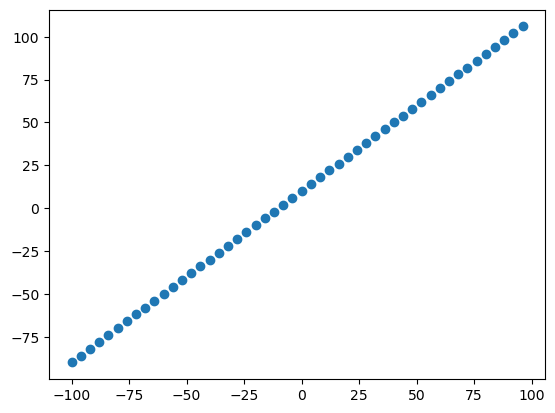

In [24]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

# The 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data availale.

**Generalization** = The ability for a machine learning model to perform well on data it hasn't seen before

In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
# Split the data into train and test sets
X_train = X[:40]  # first 40 are training samples (80%) 
y_train = y[:40]

X_test = X[40:]  # last 10 are testing samples (20%)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

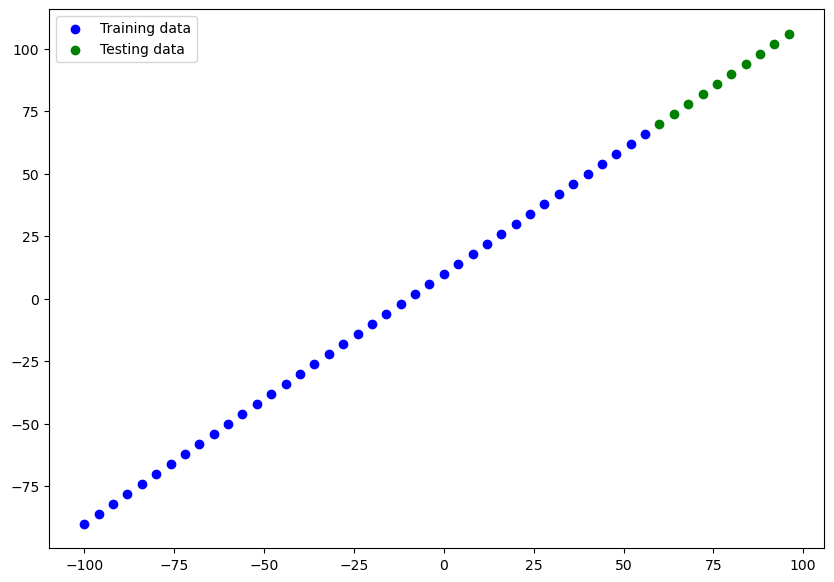

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [28]:
# # Let's have a look at how to build a neural network for our data

# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1, input_shape)
# ])

# # 2.Compile the model
# model.compile(loss=tf.keras.losses.mae,
#              optimizer=tf.keras.optimizers.SGD(),
#              metrics="mae")

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [29]:
def reset_model():
    # Clear the prevous session
    tf.keras.backend.clear_session()

# Visualizing

In [49]:
reset_model()

In [59]:
# Let's create a model which builds automatically by defining the input_shape arguent in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [60]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resource:** For a more in-depth overview of the trainable parameters whithin a layer, check out MIT's introduction to deep learning video.

**Exercise:** Try playing around with the number ofidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling model.summar().

 ### Let's fit our model to the training data

In [61]:
 model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 46.2844 - mae: 46.2844
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 25.6029 - mae: 25.6029
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.4430 - mae: 29.4430
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 16.3039 - mae: 16.3039
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 22.6413 - mae: 22.6413
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 10.7531 - mae: 10.7531
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.7671 - mae: 11.7671
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 12.1443 - mae: 12.1443
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 38.1781 - mae: 38.1781
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 25.7380 - mae: 25.7380
Epoch 11/100
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 3ms/step - loss: 11.0646 - mae: 11.0646
Epoch 88/100
2/2 [==============================] - 0s 5ms/step - loss: 25.2113 - mae: 25.2113
Epoch 89/100
2/2 [==============================] - 0s 3ms/step - loss: 9.3917 - mae: 9.3917
Epoch 90/100
2/2 [==============================] - 0s 10ms/step - loss: 17.4716 - mae: 17.4716
Epoch 91/100
2/2 [==============================] - 0s 3ms/step - loss: 10.8402 - mae: 10.8402
Epoch 92/100
2/2 [==============================] - 0s 6ms/step - loss: 19.1613 - mae: 19.1613
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 8.3499 - mae: 8.3499
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 11.5947 - mae: 11.5947
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 26.2082 - mae: 26.2082
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2236 - mae: 11.2236
Epoch 97/100
2/2 [==============================] - 0s 3ms/step - 

In [62]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


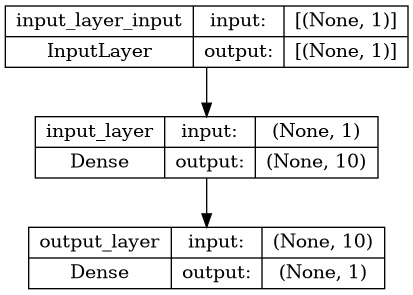

In [63]:
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model=model, show_shapes=True)

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualizing our model predictions
To visualize predictions, it's a good idea to plot them against the groud truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred

In [64]:
# MAke some predicitons
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 48ms/step


array([[ 78.3415  ],
       [ 83.44763 ],
       [ 88.55375 ],
       [ 93.65987 ],
       [ 98.76598 ],
       [103.872116],
       [108.97824 ],
       [114.084366],
       [119.19048 ],
       [124.29659 ]], dtype=float32)

In [65]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [70]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # PLot model's predicting in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

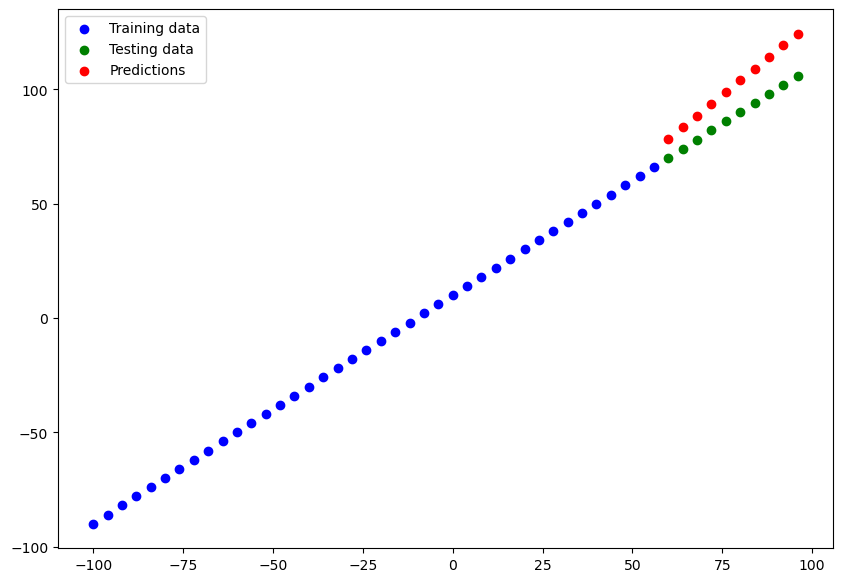

In [72]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how rong is each of my model's predictions"
* MSE - mean square, "square the average errors: